In [1]:
import requests
from lxml import etree
import json

**题目:爬取指定贴吧的所有主题贴的名称，并保存主题帖中的图片链接**

# 分析

为了爬取方便，此处使用贴吧旧版:http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m

在此处找到的该旧版连接：https://zhidao.baidu.com/question/1052866309468497819.html

- 分析每页对应链接:
    - 第一页：http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=%E4%B8%9C%E5%8C%97%E5%A4%A7%E5%AD%A6&lp=1030
    - 第二页：http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=%E4%B8%9C%E5%8C%97%E5%A4%A7%E5%AD%A6&lp=5011&lm=&pn=20
    - 第三页：http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=%E4%B8%9C%E5%8C%97%E5%A4%A7%E5%AD%A6&lp=5011&lm=&pn=40
    - 第四页：http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=%E4%B8%9C%E5%8C%97%E5%A4%A7%E5%AD%A6&lp=5011&lm=&pn=60

`可以发现每页的变化只是最后的 pn=? 改变`

- 处理：
    - 然后尝试在浏览器中删去 lp lm,发现依旧可以访问到资源，这两个参数可以删去

# 各项变量

In [2]:
# 设置贴吧名称
tieba_name = "东北大学"

In [3]:
# 除去参数后的链接，用于拼接用
url_begin_part = "http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/"
# 设置初始位置
url_start = "http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=" + tieba_name+"&pn=0"
# 避免反爬虫，添加header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

# 各组件定义与测试

## 解析url

In [4]:
# 发送请求，获取响应内容
def parse_url(url):
    print(url)  # 输出当前正在解析的路径
    response = requests.get(url, headers=headers)
    return response.content  # lxml不支持解析后的字符串

In [5]:
# 测试
print(parse_url(url_start).decode("utf-8"))

http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=东北大学&pn=0
<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE html PUBLIC "-//WAPFORUM//DTD XHTML Mobile 1.0//EN" "http://www.wapforum.org/DTD/xhtml-mobile10.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><!--STATUS OK--><!--STATIC http://static.tieba.baidu.com/tb/mobile/wfrs20120222_62351 --><head><meta name="keywords" content="贴吧,百度贴吧,论坛,兴趣,社区,BBS" /><meta name="description" content="百度贴吧——全球最大的中文社区。贴吧的使命是让志同道合的人相聚。不论是大众话题还是小众话题，都能精准地聚集大批同好网友，展示自我风采，结交知音，搭建别具特色的“兴趣主题“互动平台。贴吧目录涵盖游戏、地区、文学、动漫、娱乐明星、生活、体育、电脑数码等方方面面，是全球最大的中文交流平台，它为人们提供一个表达和交流思想的自由网络空间，并以此汇集志同道合的网友。" /><meta http-equiv="Content-Type" content="application/xhtml+xml; charset=UTF-8"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8; X-Wap-Proxy-Cookie=none" /><style type="text/css">body{font-size:small;line-height:1.4em;margin:1px;}form{margin:0;padding:0;}a{text-decoration: none;};a img{border:none;}.light{color:#c60a00;}html{-webkit-text-size-adjust:none;}

## 数据解析儿--获取主题帖中的图片链接

In [6]:
# 因为之后会用到，所以写到了前面

# 递归调用
def get_img_list(url, total_img_list):  # 获取帖子中的的图片
    # 获取第一页的html
    html_str = parse_url(url)
    html = etree.HTML(html_str)

    # 提取第一页的图片，提取下一页的地址
    img_list = html.xpath("//img[@class='BDE_Image']/@src")
    total_img_list.extend(img_list)

    # 解析页下一页的地址，循环操作
    next_url = html.xpath("//a[text()='下一页']/@href")
    if len(next_url) > 0:
        next_url = url_begin_part + next_url[0]
        return get_img_list(next_url, total_img_list)

    return total_img_list

In [7]:
# 测试
get_img_list(
    "http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7140287504&is_bakan=0&lp=5010&pinf=1_2_0", [])

http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7140287504&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7140287504&new_word=&pinf=1_2_0&pn=30&lp=6005


['http://tiebapic.baidu.com/forum/w%3D96%3Bq%3D45%3Bg%3D0/sign=9ab62a6abfd3fd1f3609ae3c0b3f182b/175b0ad162d9f2d34f119dabbeec8a136227cca5.jpg?&src=http%3A%2F%2Ftiebapic.baidu.com%2Fforum%2Fpic%2Fitem%2F175b0ad162d9f2d34f119dabbeec8a136227cca5.jpg',
 'http://tiebapic.baidu.com/forum/w%3D96%3Bq%3D45%3Bg%3D0/sign=4b9a5ac1deea15ce41eeec0f8d7107c7/d5bdc8fcc3cec3fdb4a29331c188d43f86942700.jpg?&src=http%3A%2F%2Ftiebapic.baidu.com%2Fforum%2Fpic%2Fitem%2Fd5bdc8fcc3cec3fdb4a29331c188d43f86942700.jpg']

同时可以发现，之后后半部分的图片链接才可以获取原版图片，而非图片的缩略图。因为上方为递归函数，为更为清晰，就将后半段字符串的提取和解码放到之后再做

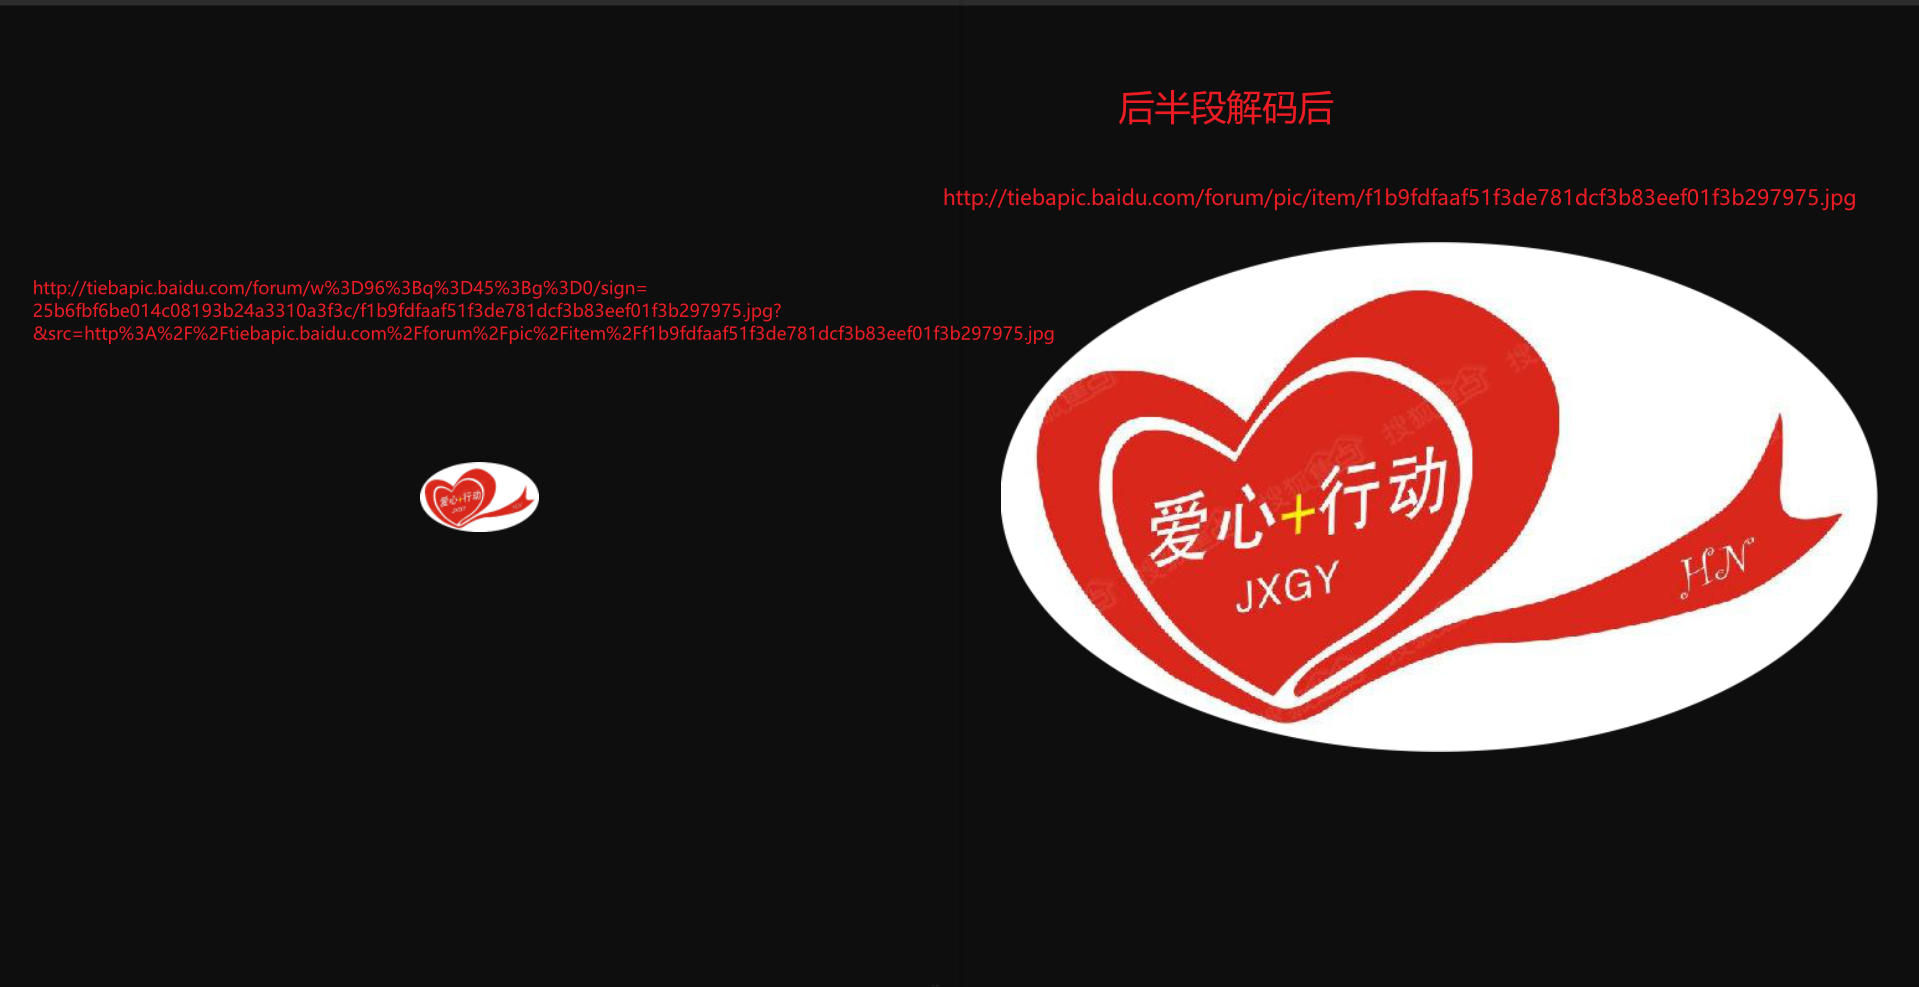

## 数据解析--获取主题帖列表以及下一页链接

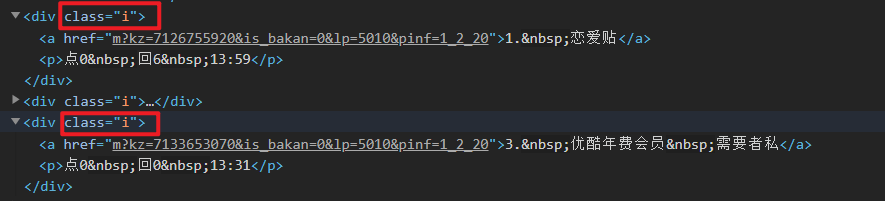

可以发现每个主题帖都对应一个div，而且class中都有i

In [8]:
def get_tie_list(html_str):
    html = etree.HTML(html_str)

    # 获取给定url页面的所有帖子对应的div
    div_list = html.xpath("//div[contains(@class,'i')]")
    content_list = []
    for div in div_list:
        item = {}
        # 获取帖子内容
        if len(div.xpath("./a/text()")) > 0:
            item["title"] = div.xpath("./a/text()")[0]

        # 获取帖子的链接。（之后提取图片用）
        if len(div.xpath("./a/@href")) > 0:
            item["href"] = url_begin_part + div.xpath("./a/@href")[0]

        # 获取每一个帖子的图片列表
        item["img_list"] = get_img_list(item["href"], [])

        item["img_list"] = [requests.utils.unquote(
            i).split("src=")[-1] for i in item["img_list"]]  # 解码和分割字符串
        content_list.append(item)

    # 获取下一页的url地址
    if len(html.xpath("//a[text()='下一页']/@href")) > 0:
        next_url = url_begin_part + html.xpath("//a[text()='下一页']/@href")[0]
    else:
        next_url = None

    return content_list, next_url

In [9]:
# 测试
get_tie_list(parse_url(url_start))

http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=东北大学&pn=0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7032061964&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&new_word=&pinf=1_2_0&pn=30&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&new_word=&pinf=1_2_0&pn=60&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&new_word=&pinf=1_2_0&pn=90&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6821211852&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6821211852&new_word=&pinf=1_2_0&pn=30&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7146324452&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7146183767&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_24

([{'title': '1.\xa0"旧物传情，衣暖人心"\xa0\xa0\xa0——“一元爱心超市”募捐活动火热启...',
   'href': 'http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7032061964&is_bakan=0&lp=5010&pinf=1_2_0',
   'img_list': ['http://tiebapic.baidu.com/forum/pic/item/c86d7d1ed21b0ef4144dee01cac451da80cb3e72.jpg',
    'http://tiebapic.baidu.com/forum/pic/item/c5438a13632762d09094d2e0b7ec08fa503dc672.jpg',
    'http://tiebapic.baidu.com/forum/pic/item/6fe078f0f736afc34aa1493aa419ebc4b645126a.jpg',
    'http://tiebapic.baidu.com/forum/pic/item/5834033b5bb5c9ea875c75bcc239b6003bf3b375.jpg',
    'http://tiebapic.baidu.com/forum/pic/item/bdafbaa1cd11728b4682fa7ddffcc3cec2fd2c74.jpg',
    'http://tiebapic.baidu.com/forum/pic/item/f1b9fdfaaf51f3de781dcf3b83eef01f3b297975.jpg']},
  {'title': '2.\xa0【NEU】考研资料信息交流贴',
   'href': 'http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&is_bakan=0&lp=5010&pinf=1_2_0',
   'img_list': ['http://tiebapic.baidu.com/forum/pic/item/30cf34a85edf8db1180900051e23dd54574e74df.jpg',


## 文件保存

In [15]:
# 注意，在下面执行之前，要添加[，执行完后删除最后一个逗号，在添加 ]

def save(tie_list):  # 保存数据
    file_path = tieba_name+"主题帖信息.json"
    with open(file_path, "a", encoding="utf-8") as f:
        for tie in tie_list:
            f.write(json.dumps(tie, ensure_ascii=False, indent=2))
            f.write(",")
            f.write("\n")
    print("保存成功")

# 执行

因为页数太多，为避免花费太多时间,所以此处只演示保存10页

In [18]:
# 扒取10页


with open(tieba_name+"主题帖信息.json", "a", encoding="utf-8") as f:
    f.write("[")

i = 0
next_url = url_start  # 初始化为 url_start
while next_url is not None and i < 10:
    i += 1
    html_str = parse_url(next_url)
    tie_list, next_url = get_tie_list(html_str)
    save(tie_list)
    
with open(tieba_name+"主题帖信息.json", "ab") as f:
    f.seek(-3, 2)
    f.truncate()
    f.write(b"]")

http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kw=东北大学&pn=0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7032061964&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&new_word=&pinf=1_2_0&pn=30&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&new_word=&pinf=1_2_0&pn=60&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6528582810&new_word=&pinf=1_2_0&pn=90&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6821211852&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6821211852&new_word=&pinf=1_2_0&pn=30&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7145428050&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7146324452&is_bakan=0&lp=5010&pinf=1_2_0
http://tieba.baidu.com/mo/q----,sz@320_24

http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6464394060&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=2954923479&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=6699535285&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7140219612&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7143565782&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7141611564&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7141348297&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7143440265&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7143395017&is_bakan=0&lp=5010&pinf=1_2_60
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7143329617&is_bakan=0&lp=5010&pinf=1_2_60
保存成功
http://tieba.ba

http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7137584514&is_bakan=0&lp=5010&pinf=1_2_140
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=5850821885&is_bakan=0&lp=5010&pinf=1_2_140
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7135353803&is_bakan=0&lp=5010&pinf=1_2_140
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7137560718&is_bakan=0&lp=5010&pinf=1_2_140
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=5233701747&is_bakan=0&lp=5010&pinf=1_2_140
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=5233701747&new_word=&pinf=1_2_140&pn=30&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=5233701747&new_word=&pinf=1_2_140&pn=60&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=5233701747&new_word=&pinf=1_2_140&pn=90&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=5233701747&new_word=&pinf=1_2_140&pn=120&lp=6005
http://tieba.baidu.com/mo/q----,sz@320_240-1-3---2/m?kz=7137501278&is_bakan=0&lp=5010&pi

In [12]:
# 扒取全部，很耗时间

# with open(tieba_name+"主题帖信息.json", "a", encoding="utf-8") as f:
#     f.write("[")
# 
# next_url = url_start  # 初始化为 url_start
# while next_url is not None :
#     i += 1
#     html_str = parse_url(next_url)
#     tie_list, next_url = get_tie_list(html_str)
#     save(tie_list)
#     
# with open(tieba_name+".json", "ab") as f:
#     f.seek(-3, 2)
#     f.truncate()
#     f.write(b"]")